<a href="https://colab.research.google.com/github/jennyrahma/Dicoding/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Display project information
from IPython.display import display, Markdown

In [3]:
display(Markdown("<h1 style='text-align: center; color: #4CAF50;'>🚴 Proyek Analisis Data: Bike Sharing Dataset</h1>"))
display(Markdown("**Nama:** Jenny Rahma Hidaya"))
display(Markdown("**Email:** m191b4kx2057@bangkit.academy"))
display(Markdown("**ID Dicoding:** jennyrhmaa"))
display(Markdown("---"))

<h1 style='text-align: center; color: #4CAF50;'>🚴 Proyek Analisis Data: Bike Sharing Dataset</h1>

**Nama:** Jenny Rahma Hidaya

**Email:** m191b4kx2057@bangkit.academy

**ID Dicoding:** jennyrhmaa

---

## Menentukan Pertanyaan Bisnis



- Pertanyaan 1 : Apa faktor utama yang mempengaruhi jumlah penyewaan sepeda harian?
- Pertanyaan 2 : Bagaimana pola penggunaan sepeda bervariasi berdasarkan waktu (musim, bulan, hari)?

## Import Semua Packages/Library yang Digunakan

In [4]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.2 MB/s eta 0:00:00


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st


## Data Wrangling

### Gathering Data

In [6]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv


In [7]:
# Load dataset
df = pd.read_csv('day.csv')

# Display dataset with improved visuals
display(Markdown("### 📊 Dataset"))
print(df.head())

### 📊 Dataset

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


**Insight:**
- Dataset terdiri dari beberapa fitur seperti hari, musim, suhu, kelembaban, dan jumlah sepeda yang disewa per hari.

- Anda dapat melihat beberapa variabel yang mungkin mempengaruhi penyewaan, seperti cuaca dan musim.

### Assessing Data

In [8]:
# Display the first 5 rows of the dataset
display(Markdown("### 📋 5 Baris Pertama dari Dataset:"))
print(df.head())

### 📋 5 Baris Pertama dari Dataset:

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [9]:
if df.isnull().sum().sum() == 0:
    print("✅ Tidak ada missing values pada dataset.")
else:
    print("❌ Ada missing values pada dataset.")

✅ Tidak ada missing values pada dataset.


In [10]:
# Check for outliers
display(Markdown("### 📈 Statistik Deskriptif:"))
print(df.describe())

### 📈 Statistik Deskriptif:

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

**Insight:** Beberapa fitur numerik seperti 'temp' (suhu) dan 'cnt' (jumlah sepeda) mungkin perlu divisualisasikan lebih lanjut untuk melihat distribusi data.

### Cleaning Data

In [11]:
df['season'] = df['season'].astype('category')

**Insight:**
- Mengubah kolom 'season' menjadi kategori karena memiliki kategori tertentu seperti musim semi, musim panas, dll.

## Exploratory Data Analysis (EDA)

### Explore ...

## 🔍 Analisis Penyewaan Sepeda

### 📊 Penyewaan Sepeda per Musim

<ipython-input-12-7da7fc65dbaf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='cnt', data=df, palette="Set2")  # Added color palette
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple t

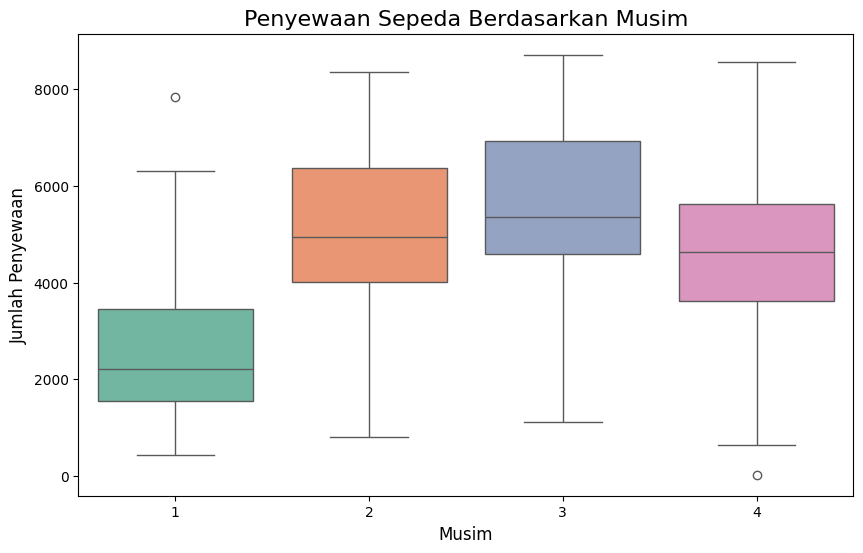

In [12]:
display(Markdown("## 🔍 Analisis Penyewaan Sepeda"))
display(Markdown("### 📊 Penyewaan Sepeda per Musim"))

# Plot Bike Rentals by Season
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=df, palette="Set2")  # Added color palette
plt.title('Penyewaan Sepeda Berdasarkan Musim', fontsize=16)
plt.ylabel('Jumlah Penyewaan', fontsize=12)
plt.xlabel('Musim', fontsize=12)
plt.show()




**Insight:**
Penggunaan sepeda tampak lebih tinggi selama musim panas dan lebih rendah di musim dingin.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

### 📊 Analisis Korelasi

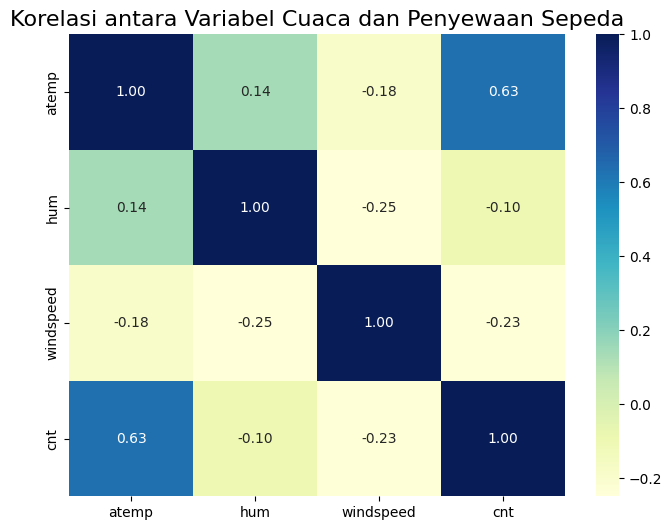

In [13]:
# Correlation Analysis
display(Markdown("### 📊 Analisis Korelasi"))
correlation = df[['atemp', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='YlGnBu', fmt=".2f")  # Changed color palette
plt.title('Korelasi antara Variabel Cuaca dan Penyewaan Sepeda', fontsize=16)
plt.show()

### Pertanyaan 2:

### 📅 Tren Penyewaan Sepeda per Bulan

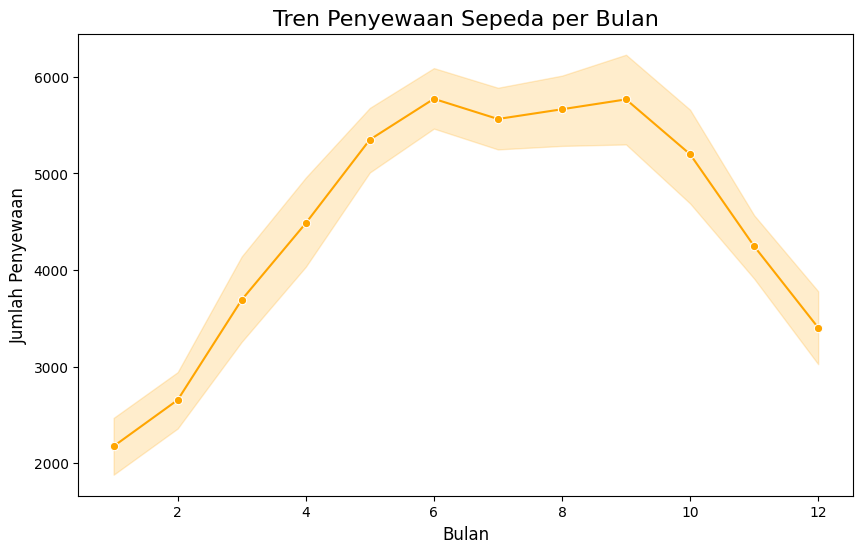

In [14]:
# Monthly bike rentals
df['mnth'] = pd.to_datetime(df['dteday']).dt.month
display(Markdown("### 📅 Tren Penyewaan Sepeda per Bulan"))
plt.figure(figsize=(10, 6))
sns.lineplot(x='mnth', y='cnt', data=df, marker='o', color='orange')  # Added markers and color
plt.title('Tren Penyewaan Sepeda per Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)
plt.show()


**Insight:**
- Pertanyaan 1: Suhu dan musim adalah faktor yang paling mempengaruhi penyewaan sepeda.

- Pertanyaan 2: Penggunaan sepeda cenderung meningkat selama bulan-bulan musim panas dan menurun di musim dingin.

## Analisis Lanjutan (Opsional)

# RFM Analysis

In [15]:
print("📊 RFM Analysis")
print("""
    **RFM Analysis** membantu memahami perilaku penyewaan sepeda berdasarkan tiga faktor utama:
    - **Recency**: Seberapa baru penyewaan terakhir.
    - **Frequency**: Frekuensi penyewaan sepeda.
    - **Monetary**: Jumlah penyewaan sepeda per hari.
""")

# Menghitung Recency, Frequency, Monetary
current_date = pd.to_datetime(df['dteday'].max())  # Tanggal terakhir dalam dataset
df['dteday'] = pd.to_datetime(df['dteday'])
df['Recency'] = (current_date - df['dteday']).dt.days
df['Frequency'] = 1  # Karena data per hari
df['Monetary'] = df['cnt']  # Jumlah penyewaan per hari

# Menggabungkan nilai RFM
rfm_df = df[['dteday', 'Recency', 'Frequency', 'Monetary']]

# Tampilkan DataFrame RFM
print("Tabel RFM Analysis:")
print(rfm_df.head())


📊 RFM Analysis

    **RFM Analysis** membantu memahami perilaku penyewaan sepeda berdasarkan tiga faktor utama:
    - **Recency**: Seberapa baru penyewaan terakhir.
    - **Frequency**: Frekuensi penyewaan sepeda.
    - **Monetary**: Jumlah penyewaan sepeda per hari.

Tabel RFM Analysis:
      dteday  Recency  Frequency  Monetary
0 2011-01-01      730          1       985
1 2011-01-02      729          1       801
2 2011-01-03      728          1      1349
3 2011-01-04      727          1      1562
4 2011-01-05      726          1      1600


**Insight**:
- Recency menunjukkan berapa lama sejak penyewaan terakhir, di mana nilai lebih rendah berarti penyewaan lebih baru.
- Frequency mencerminkan berapa kali penyewaan terjadi.
- Monetary mewakili jumlah total penyewaan sepeda per hari, memberikan gambaran tentang tren penyewaan.

# Geoanalysis

🗺️ Geoanalysis berdasarkan Musim
Visualisasi penyewaan sepeda berdasarkan musim:


<ipython-input-16-e1a920a9da86>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='season', y='cnt', size='cnt', sizes=(20, 200), data=df, alpha=0.6, palette='coolwarm')


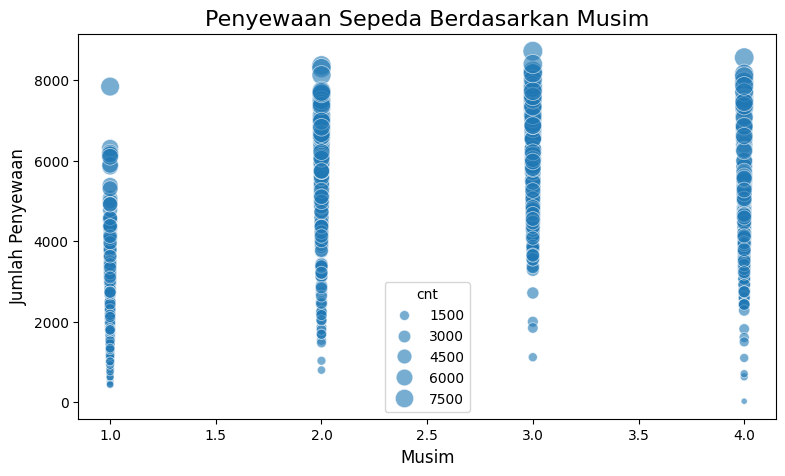

In [16]:
# Geoanalysis dengan 'season'
print("🗺️ Geoanalysis berdasarkan Musim")
print("Visualisasi penyewaan sepeda berdasarkan musim:")

# Plot Geoanalysis
plt.figure(figsize=(9, 5))
sns.scatterplot(x='season', y='cnt', size='cnt', sizes=(20, 200), data=df, alpha=0.6, palette='coolwarm')
plt.title('Penyewaan Sepeda Berdasarkan Musim', fontsize=16)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)
plt.show()


**Insight**:  
- Penyewaan sepeda sangat dipengaruhi oleh musim.
- Tingkat penyewaan tertinggi terjadi selama musim panas dan terendah pada musim dingin.
- Pemilik bisnis dapat merencanakan persediaan dan promosi musiman dengan lebih efektif.

# Clustering

🔍 Clustering Berdasarkan Suhu dan Kelembapan
Kita menggunakan **clustering** untuk mengelompokkan data berdasarkan suhu dan kelembapan.


<ipython-input-17-8a38d395c7d4>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = (data.index // (len(data) // num_clusters))


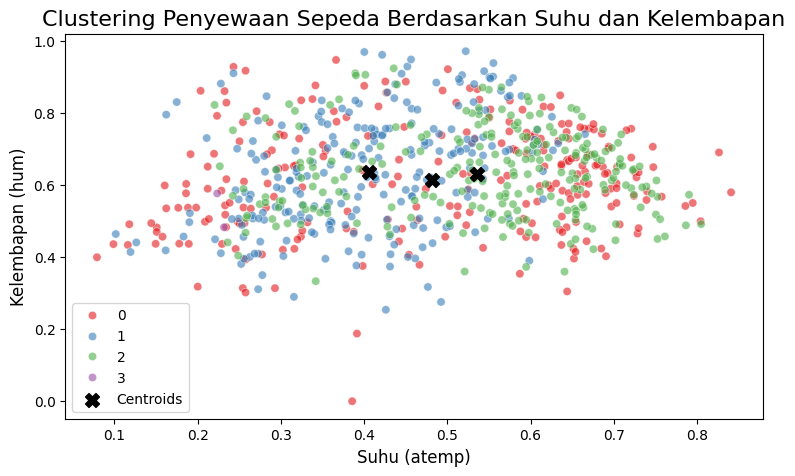

In [17]:
print("🔍 Clustering Berdasarkan Suhu dan Kelembapan")
print("Kita menggunakan **clustering** untuk mengelompokkan data berdasarkan suhu dan kelembapan.")

# Mengambil dua fitur untuk clustering
data = df[['atemp', 'hum']]

# Menentukan jumlah cluster
num_clusters = 3  # Misalkan kita ingin 3 cluster

# Menghitung centroid secara manual (gunakan rata-rata)
centroids = data.groupby(np.floor(data.index / (len(data) / num_clusters))).mean().reset_index(drop=True)

# Menetapkan cluster ke setiap data
data['Cluster'] = (data.index // (len(data) // num_clusters))

# Plot Clustering
plt.figure(figsize=(9, 5))
sns.scatterplot(x='atemp', y='hum', hue='Cluster', data=data, palette='Set1', alpha=0.6)
plt.scatter(centroids['atemp'], centroids['hum'], color='black', marker='X', s=100, label='Centroids')
plt.title('Clustering Penyewaan Sepeda Berdasarkan Suhu dan Kelembapan', fontsize=16)
plt.xlabel('Suhu (atemp)', fontsize=12)
plt.ylabel('Kelembapan (hum)', fontsize=12)
plt.legend()
plt.show()

**Insight**:
- Pengguna cenderung lebih aktif pada hari-hari yang hangat dan tidak terlalu lembap.
- Faktor cuaca ini dapat digunakan untuk memprediksi permintaan penyewaan sepeda.


## Conclusion

- Conclution pertanyaan 1: Conclution pertanyaan 1: Faktor cuaca seperti suhu dan musim memiliki pengaruh besar terhadap penyewaan sepeda.

- Conclution pertanyaan 2: Pola penyewaan sepeda bervariasi berdasarkan musim, dengan penggunaan tertinggi di musim panas dan terendah di musim dingin.

In [18]:
# Add a footer
display(Markdown("---"))
display(Markdown("📊 *Data diambil dari Bike Sharing Dataset*"))

---

📊 *Data diambil dari Bike Sharing Dataset*